# Project Setup

In [30]:
import urllib.request
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

# Dataset Exploration

In [7]:
df_vt = pd.read_csv('./data/VT-clean.csv.gz', compression='gzip', low_memory=False)

In [8]:
df_vt.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
0,VT-2010-00001,VT,2010-07-01,00:10,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
1,VT-2010-00002,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
2,VT-2010-00003,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
3,VT-2010-00004,VT,2010-07-01,00:11,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
4,VT-2010-00005,VT,2010-07-01,00:35,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08


In [11]:
df_vt.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'officer_id'],
      dtype='object')

In [56]:
df_vt['county_name'].value_counts()

Windham County       38160
Windsor County       37096
Chittenden County    26571
Washington County    25974
Orange County        25463
Rutland County       23940
Addison County       23756
Bennington County    22651
Franklin County      20184
Caledonia County     17177
Orleans County       10617
Lamoille County       9094
Essex County          1359
Grand Isle County      538
Name: county_name, dtype: int64

In [44]:
vermont_geojson_url = 'https://storage.googleapis.com/cdn.patricktriest.com/data/vermont.json'
vermont_geojson = urllib.request.urlopen(vermont_geojson_url).read().decode('utf-8')
vermont_geojson = ast.literal_eval(vermont_geojson)

In [17]:
df_vt.groupby('driver_gender').count()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_age_raw,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
driver_gender,,,,,,,,,,,,,,,,,,,,,
F,101895,101895,101895,101895,101645,101643,101643,101824,101895,101572,...,100324,101272,101272,101895,101253,684,101883,101214,101895,101889
M,179678,179678,179678,179678,179243,179234,179234,179404,179678,179098,...,176778,178168,178168,179678,178126,2714,179656,178083,179678,179672


In [6]:
df_vt['driver_gender'].value_counts()

M    179678
F    101895
Name: driver_gender, dtype: int64

In [7]:
df_vt['driver_race'].value_counts()

White       266216
Black         5741
Asian         3607
Hispanic      2625
Other          279
Name: driver_race, dtype: int64

In [10]:
df_vt.count()

id                       283285
state                    283285
stop_date                283285
stop_time                283285
location_raw             282591
county_name              282580
county_fips              282580
fine_grained_location    282938
police_department        283285
driver_gender            281573
driver_age_raw           282114
driver_age               281999
driver_race_raw          279301
driver_race              278468
violation_raw            281107
violation                281107
search_conducted         283285
search_type_raw          281045
search_type                3419
contraband_found         283251
stop_outcome             280960
is_arrested              283285
officer_id               283273
dtype: int64

# Clean Data

In [57]:
# Drop rows with missing values for important fields
df_vt['search_conducted'].dropna(inplace=True)
df_vt['contraband_found'].dropna(inplace=True)
df_vt['county_name'].dropna(inplace=True)
df_vt['driver_age'].dropna(inplace=True)
df_vt['driver_race'].dropna(inplace=True)
df_vt['driver_gender'].dropna(inplace=True)

df_vt['search_type'].fillna('N/A', inplace=True)
df_vt.dropna(inplace=True)

In [58]:
df_vt.count()

id                       273181
state                    273181
stop_date                273181
stop_time                273181
location_raw             273181
county_name              273181
county_fips              273181
fine_grained_location    273181
police_department        273181
driver_gender            273181
driver_age_raw           273181
driver_age               273181
driver_race_raw          273181
driver_race              273181
violation_raw            273181
violation                273181
search_conducted         273181
search_type_raw          273181
search_type              273181
contraband_found         273181
stop_outcome             273181
is_arrested              273181
officer_id               273181
dtype: int64

# Analyze Data

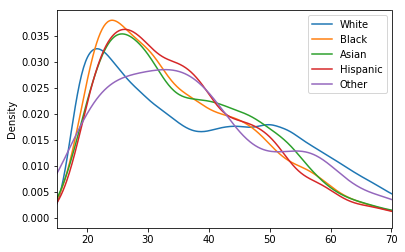

In [31]:
fig, ax = plt.subplots()
ax.set_xlim(15, 70)
for race in df_vt['driver_race'].unique():
    s = df_vt[df_vt['driver_race'] == race]['driver_age']
    s.plot.kde(ax=ax, label=race)
ax.legend()

In [59]:
def compute_search_stats(df):
    search_conducted = df['search_conducted']
    contraband_found = df['contraband_found']
    n_stops     = len(search_conducted)
    n_searches  = sum(search_conducted)
    n_hits      = sum(contraband_found)
    
    if (n_stops) < 50:
        search_rate = None
    else:
        search_rate = n_searches / n_stops
    
    if (n_searches) < 5:
        hit_rate = None
    else:
        hit_rate = n_hits / n_searches
    
    return(pd.DataFrame(data = { 
        'n_stops': n_stops,
        'n_searches': n_searches,
        'n_hits': n_hits,
        'search_rate': search_rate,
        'hit_rate': hit_rate
    }, index=[0]))

In [60]:
compute_search_stats(df_vt)

,hit_rate,n_hits,n_searches,n_stops,search_rate
0,0.796262,2599,3264,273181,0.011948


In [16]:
df_vt.groupby('driver_gender').apply(compute_search_stats)

,,hit_rate,n_hits,n_searches,n_stops,search_rate
driver_gender,,,,,,
F,0,0.788820,508,644,99111,0.006498
M,0,0.798092,2091,2620,174070,0.015051


In [17]:
df_vt.groupby('driver_race').apply(compute_search_stats)

,,hit_rate,n_hits,n_searches,n_stops,search_rate
driver_race,,,,,,
Asian,0,0.785714,22,28,3446,0.008125
Black,0,0.686620,195,284,5571,0.050978
Hispanic,0,0.644231,67,104,2562,0.040593
Other,0,0.600000,6,10,263,0.038023
White,0,0.813601,2309,2838,261339,0.010859


In [18]:
age_groups = pd.cut(df_vt["driver_age"], np.arange(15, 70, 5))
age_aggregation = df_vt.groupby(age_groups).apply(compute_search_stats)
age_aggregation

,,hit_rate,n_hits,n_searches,n_stops,search_rate
driver_age,,,,,,
"(15, 20]",0,0.846954,570,673,27443,0.024524
"(20, 25]",0,0.837488,840,1003,43310,0.023159
"(25, 30]",0,0.788800,493,625,34794,0.017963
"(30, 35]",0,0.766756,286,373,27784,0.013425
"(35, 40]",0,0.744186,160,215,23241,0.009251
"(40, 45]",0,0.692913,88,127,24083,0.005273
"(45, 50]",0,0.575472,61,106,24117,0.004395
"(50, 55]",0,0.697368,53,76,22532,0.003373
"(55, 60]",0,0.833333,30,36,17522,0.002055


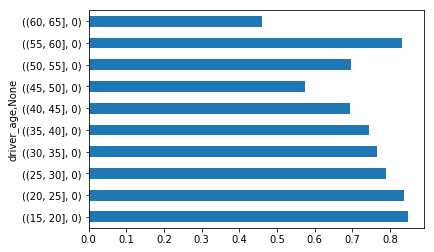

In [19]:
age_aggregation['hit_rate'].plot.barh()

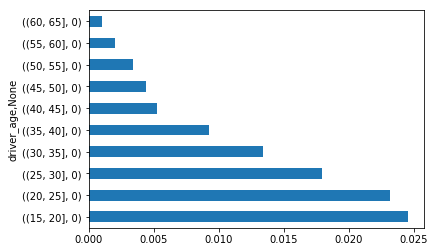

In [20]:
age_aggregation['search_rate'].plot.barh()

In [21]:
# Compare search rates between races and genders
race_gender_agg = df_vt.groupby(['driver_race', 'driver_gender']).apply(compute_search_stats)

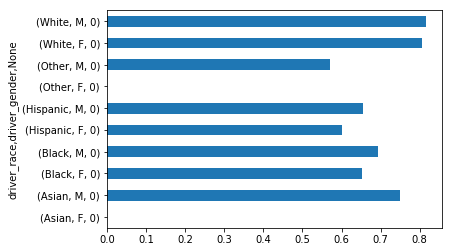

In [22]:
race_gender_agg['hit_rate'].plot.barh()

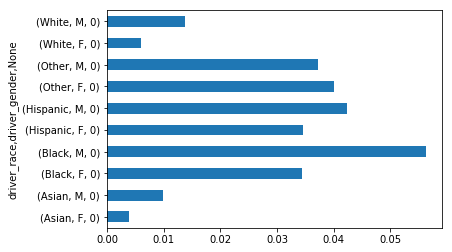

In [23]:
race_gender_agg['search_rate'].plot.barh()

In [68]:
def visualize_search_stats_by_county(df):
    """Generate a scatter plot of search rate vs. hit rate by race and county"""
    race_location_agg = df.groupby(['county_name','driver_race']).apply(compute_search_stats)

    fig, ax = plt.subplots()
    for c, frame in race_location_agg.groupby('driver_race'):
        ax.scatter(x=frame['hit_rate'], y=frame['search_rate'], label=c)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
              ncol=5, fancybox=True)
    ax.set_xlabel('Hit Rate')
    ax.set_ylabel('Search Rate')

In [62]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

def visualize_county_hit_rates(df):
    race_location_agg = df.groupby(['county_name','driver_race']).apply(compute_search_stats)
    traces = []
    
    for c, frame in race_location_agg.groupby('driver_race'):
        trace = go.Scatter(
            x = frame['hit_rate'],
            y = frame['search_rate'],
            mode = 'markers',
            marker = dict( size = 12 ),
            name = c,
            hoverinfo = 'text',
            text= frame.index.get_level_values(0)
        )
        
        traces.append(trace)
    
    layout = go.Layout(
        hovermode = 'closest',
        title = 'Search Metrics By County',
        xaxis = dict( title='Hit Rate' ),
        yaxis = dict( title='Search Rate' )
    )    

    fig = go.Figure(data= traces, layout = layout)
    py.iplot(fig)

In [230]:
def compute_white_vs_minority_hit_rate(df):
    df_copy = df.copy()
    df_copy['is_white'] = df_copy['driver_race'] == 'White'
    race_location_agg = df_copy.groupby(['county_name','is_white']).apply(compute_search_stats)
    traces = []

    for c, frame in race_location_agg.groupby('is_white'):
        trace = go.Scatter(
            x = frame['hit_rate'],
            y = frame['search_rate'],
            mode = 'markers',
            marker = dict( size = 12 ),
            name = ('Not White', 'White')[c],
            hoverinfo = 'text',
            text= frame.index.get_level_values(0)
        )
        
        traces.append(trace)
    
    layout = go.Layout(
        hovermode = 'closest',
        title = 'Search Metrics By County',
        xaxis = dict( title='Hit Rate' ),
        yaxis = dict( title='Search Rate' )
    )    

    fig = go.Figure(data= traces, layout = layout)
    py.iplot(fig)

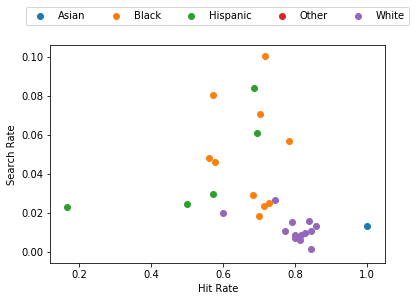

In [69]:
visualize_search_stats_by_county(df_vt)

In [156]:
compute_white_vs_minority_hit_rate(df_vt)

False
True


In [122]:
visualize_county_hit_rates(df_vt)

# Wisconsin

In [78]:
fields = ['county_name', 'driver_race', 'search_conducted', 'contraband_found']

In [90]:
df_wi = pd.read_csv('./data/WI-clean.csv.gz', compression='gzip', low_memory=False, usecols=fields)

In [91]:
df_wi.dropna(inplace=True)

In [81]:
# visualize_county_hit_rates(df_wi)

In [94]:
df_wi.groupby('driver_race').apply(compute_search_stats)

,,hit_rate,n_hits,n_searches,n_stops,search_rate
driver_race,,,,,,
Asian,0,0.470817,121,257,24577,0.010457
Black,0,0.477574,1299,2720,56050,0.048528
Hispanic,0,0.415741,449,1080,35210,0.030673
Other,0,0.509709,210,412,11361,0.036264
White,0,0.526300,5103,9696,778227,0.012459


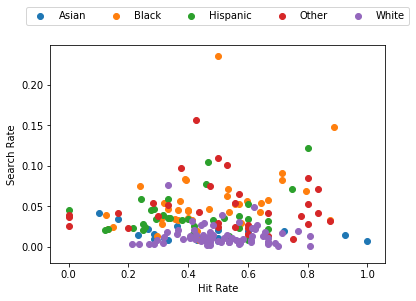

In [82]:
visualize_search_stats_by_county(df_wi)

In [92]:
#compute_white_vs_minority_hit_rate(df_wi)

# MA

In [83]:
df_ma = pd.read_csv('./data/MA-clean.csv.gz', compression='gzip', low_memory=False, usecols=fields)

In [84]:
df_ma.dropna(inplace=True)

In [89]:
df_ma.groupby('driver_race').apply(compute_search_stats)

,,hit_rate,n_hits,n_searches,n_stops,search_rate
driver_race,,,,,,
Asian,0,0.331169,357,1078,101942,0.010575
Black,0,0.487150,4170,8560,350498,0.024422
Hispanic,0,0.449502,5007,11139,337782,0.032977
Other,0,0.358442,276,770,75370,0.010216
White,0,0.523037,18220,34835,2527393,0.013783


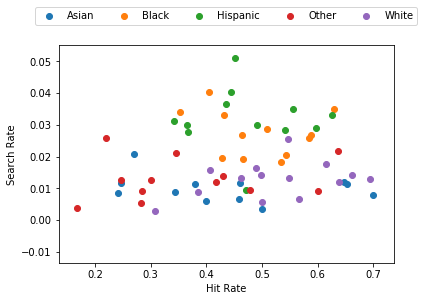

In [86]:
# visualize_county_hit_rates(df_ma)

In [87]:
# compute_white_vs_minority_hit_rate(df_ma)

In [233]:
df_ma_tmp = df_ma.copy()
df_ma_tmp['is_white'] = df_ma_tmp['driver_race'] == 'White'
race_location_agg = df_ma_tmp.groupby(['county_name','is_white']).apply(compute_hit_rate)

In [240]:
race_location_agg.iloc[0]

hit_rate          0.348592
n_hits           99.000000
n_searches      284.000000
n_stops        9750.000000
search_rate       0.029128
Name: (Barnstable County, False, 0), dtype: float64

In [335]:
def compute_bad_search_rates(df):
    """Compute what percentage of stops will result in a search where no contraband is found"""
    df_tmp = df.copy()
    df_tmp['is_white'] = df_tmp['driver_race'] == 'White'
    race_location_agg = df_tmp.groupby(['county_name','is_white']).apply(compute_hit_rate)    
    county_dict = {}
    for index in range(0, len(race_location_agg), 2):
        non_white_row = race_location_agg.iloc[index]
        white_row = race_location_agg.iloc[index+1]
        county = race_location_agg.iloc[index].name[0]

        white_bad_search_rate = (white_row.n_searches - white_row.n_hits) / white_row.n_stops
        non_white_bad_search_rate = (non_white_row.n_searches - non_white_row.n_hits) / non_white_row.n_stops

        county_dict[county] = dict(
            bias = non_white_bad_search_rate/ white_bad_search_rate,
            white = white_bad_search_rate,
            non_white = non_white_bad_search_rate)
    return county_dict

In [336]:
ma_county_data = compute_bad_search_rates(df_ma)

In [339]:
ma_county_df = pd.DataFrame.from_dict(ma_county_data, orient='index')

In [342]:
ma_county_df.to_csv('ma_county_stats.csv')